<a href="https://colab.research.google.com/github/diogoazevedo15/zgli_quickstart/blob/main/Zgli_Quick_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Zgli
We start by performing the `pip install` of the zgli library. 

In [23]:
!pip install zgli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Imports
Here we import all the libraries necessary for this quick start example.

In [24]:
from zgli.folder import Folder                          # Module for distance computation
from sklearn.cluster import AgglomerativeClustering     # Module for clustering
from scipy.cluster.hierarchy import dendrogram          # Module to plot results
from matplotlib import pyplot as plt                    # Module to plot results
import numpy as np                                      # Numpy for operations

# 3. Distance Matrix
Here we use the **zgli.folder Folder** class to compute the **NCD distance matrix** between all files inside the 10-mammals folder.

In [25]:
data_path = '/content/10-mammals/'                    # Define data path to the folther containing the files
compressor = 'bzlib'                                  # Define the compressor to be used
output_path = '/content'                              # Define output path for distance_matrix.txt

folder = Folder(data_path)                            # Initialize Folder class
dm = folder.distance_matrix(compressor, output_path)  # Compute distances

Compressing Files...


  0%|          | 0/10 [00:00<?, ?it/s]

Compressing Appended Files...


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

2_blueWhale.txt 0.0 0.96105 0.960009 0.958167 0.957282 0.955691 0.95903 0.960157 0.854465 0.949342
1_graySeal.txt 0.96105 0.0 0.77382 0.966302 0.964551 0.959818 0.942299 0.964729 0.954923 0.949891
1_harborSeal.txt 0.960009 0.77382 0.0 0.96132 0.967002 0.960252 0.94423 0.962769 0.953671 0.947334
0_rat.txt 0.958167 0.966302 0.96132 0.0 0.941648 0.958732 0.958172 0.960157 0.966924 0.955044
0_mouse.txt 0.957282 0.964551 0.967002 0.941648 0.0 0.960252 0.965251 0.967124 0.960088 0.960965
3_chimpanzee.txt 0.955691 0.959818 0.960252 0.958732 0.960252 0.0 0.961604 0.8649 0.953301 0.949175
4_cat.txt 0.95903 0.942299 0.94423 0.958172 0.965251 0.961604 0.0 0.959459 0.958172 0.952166
3_human.txt 0.960157 0.964729 0.962769 0.960157 0.967124 0.8649 0.959459 0.0 0.956238 0.95123
2_finWhale.txt 0.854465 0.954923 0.953671 0.966924 0.960088 0.953301 0.958172 0.956238 0.0 0.948465
4_horse.txt 0.949342 0.949891 0.947334 0.955044 0.960965 0.949175 0.952166 0.95123 0.948465 0.0



# 5. Cluster
Build a clustering model using the **precomputed** distance matrix.

In [32]:
# Create and fit model
model = AgglomerativeClustering(affinity='precomputed', n_clusters=6, linkage='complete', compute_distances=True).fit(dm)
labels_model = ['2_blueWhale', '1_graySeal', '1_harborSeal', '0_rat', '0_mouse', '3_chimpanzee', '4_cat', '3_human', '2_finWhale', '4_horse']
print(model.labels_)

[2 3 3 0 0 1 5 1 2 4]


# 6. Plot Results
Finally, we visualize the clustering results by ploting them into a dendogram.

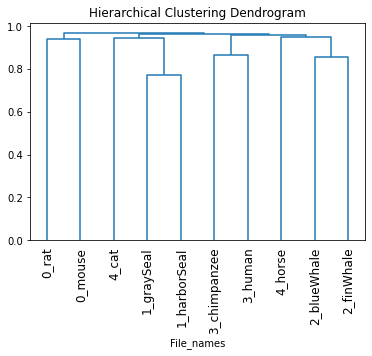

In [33]:
# Define plot function
def plot_dendrogram(model, l, **kwargs):

    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Create linkage matrix
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels = l, leaf_rotation=90)

# Create and fit model
model = AgglomerativeClustering(affinity='precomputed', n_clusters=6, linkage='complete', compute_distances=True).fit(dm)

# Plot dendogram
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, labels_model)
plt.xlabel("File_names")
plt.show()